<a href="https://colab.research.google.com/github/anggaxvi/Analisis-Data-E-Commerce/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce
- **Nama:** Aliefangga Harwa Nasir
- **Email:** aliefanggaharwan2003@gmail.com
- **ID Dicoding:** GRX54WY92P0M

## Menentukan Pertanyaan Bisnis

- Kategori produk yang laku terjual banyak
- Hubungan review dengan penjualan produk

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
order_df = pd.read_csv("https://raw.githubusercontent.com/anggaxvi/Analisis-Data-E-Commerce/refs/heads/main/data/order_items_dataset.csv")
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
review_df = pd.read_csv("https://raw.githubusercontent.com/anggaxvi/Analisis-Data-E-Commerce/refs/heads/main/data/order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
product_df = pd.read_csv("https://raw.githubusercontent.com/anggaxvi/Analisis-Data-E-Commerce/refs/heads/main/data/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membuat tabel `penjualan` untuk menggabungkan data tabel `order_df`, `review_df`, dan `product_df`



In [7]:
produk_terbanyak_df = pd.merge(
    left=order_df,
    right=product_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
produk_terbanyak_df = produk_terbanyak_df[['order_id','product_category_name']]
produk_terbanyak_df.head()


,order_id,product_category_name
0,f30149f4a8882a08895b6a242aa0d612,perfumaria
1,f5eda0ded77c1293b04c953138c8331d,automotivo
2,0bf736fd0fd5169d60de3699fcbcf986,cama_mesa_banho
3,3aba44d8e554ab4bb8c09f6f78032ca8,utilidades_domesticas
4,6f0dfb5b5398b271cc6bbd9ee263530e,utilidades_domesticas


In [8]:
penjualan_produk_df = pd.merge(
    left=produk_terbanyak_df,
    right=review_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
penjualan_produk_df = penjualan_produk_df[['order_id','product_category_name','review_score']]
penjualan_produk_df.head()

,order_id,product_category_name,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,5.0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,4.0
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,5.0
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,5.0


### Assessing Data

Menilai data tabel `penjualan_produk_df`

In [73]:
penjualan_produk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114073 entries, 0 to 114072
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               114073 non-null  object 
 1   product_category_name  111702 non-null  object 
 2   review_score           113131 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [90]:
penjualan_produk_df.isnull().sum()

,0
order_id,0
product_category_name,2371
review_score,942


In [89]:
print("Jumlah duplikasi order_id :",penjualan_produk_df.duplicated(subset=['order_id']).sum())
penjualan_produk_df.describe(include="all")


Jumlah duplikasi order_id : 14651


,order_id,product_category_name,review_score
count,114073,111702,113131.000000
unique,99422,73,NaN
top,5a3b1c29a49756e75f1ef513383c0c12,cama_mesa_banho,NaN
freq,22,11270,NaN
mean,NaN,NaN,4.016998
std,NaN,NaN,1.400074
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


**Insight:**
- Pada tabel `penjualan_produk_df` terdapat duplikasi variabel pada kolom primary `order_id`, harusnya jumlah count sama denga unique karena `order_id` primary key
- Terdapat missing value pada kolom `product_category_name` dan `review_score`

### Cleaning Data

Menghilangkan data duplikasi `order_id` pada tabel `penjualan_produk_df`

In [91]:
penjualan_produk_df.drop_duplicates(subset=['order_id'],inplace=True)
print("Jumlah setelah dibersihkan data duplikasi :",penjualan_produk_df.duplicated(subset=['order_id']).sum())

Jumlah setelah dibersihkan data duplikasi : 0


In [92]:
penjualan_produk_df.describe(include="all")

,order_id,product_category_name,review_score
count,99422,97246,98673.000000
unique,99422,73,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,cama_mesa_banho,NaN
freq,1,9297,NaN
mean,NaN,NaN,4.086853
std,NaN,NaN,1.347287
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


Membersihkan missing value pada kolom `product_category_name`

In [98]:
penjualan_produk_df.dropna(subset=['product_category_name'],inplace=True)

In [99]:
penjualan_produk_df.isna().sum()

,0
order_id,0
product_category_name,0
review_score,738


Membersihkan missing value pada kolom review

In [105]:
penjualan_produk_df['review_score'].fillna(penjualan_produk_df['review_score'].mean(),inplace=True)

In [106]:
penjualan_produk_df.isna().sum()

,0
order_id,0
product_category_name,0
review_score,0


In [108]:
penjualan_produk_df.describe(include="all")

,order_id,product_category_name,review_score
count,97246,97246,97246.000000
unique,97246,73,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,cama_mesa_banho,NaN
freq,1,9297,NaN
mean,NaN,NaN,4.107711
std,NaN,NaN,1.323873
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


**Insight:**
- Untuk mengatasi duplikasi data pada kolom `order_id` sebagai primary key menggunakan `drop.duplictaed()`
- Untuk mengatasi missing value pada kolom `product_category_name` menggunakan `dropna()` karena paling minim resiko untuk kondisi kolom tersebut
- Sedangkan untuk missing value pada kolom `review_score` menggunakan `fillna(mean)`, karena nantinya jumlah `review_score` setiap `product_category_name` akan dirata-rata

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
review_product_df = penjualan_produk_df.groupby(by="product_category_name").agg({
    'order_id':'count',
    'review_score':'mean',
}).sort_values(by='order_id',ascending=False)

review_product_df.head(100)

,order_id,review_score
product_category_name,,
cama_mesa_banho,11270,3.895663
beleza_saude,9727,4.142768
esporte_lazer,8700,4.107986
moveis_decoracao,8415,3.903493
informatica_acessorios,7894,3.930819
...,...,...
cds_dvds_musicais,14,4.642857
la_cuisine,14,4.000000
pc_gamer,9,3.333333


In [128]:
correlation = review_product_df['order_id'].corr(review_product_df['review_score'])
print("Nilai korleasi antara penjualan dan review produk : ",correlation)

Nilai korleasi antara penjualan dan review produk :  0.03349218533642357


**Insight:**
- Untuk mengathui produk yang paling laku atau tidak menggunakan pivot tabel  antara `category_product_name` dengan `count(order_id) `
- Sedangkan untuk mengetahui hubungan atau korelasi penjualan dengan produk menggunakan library pandas `.corr`

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk yang paling laku terjual

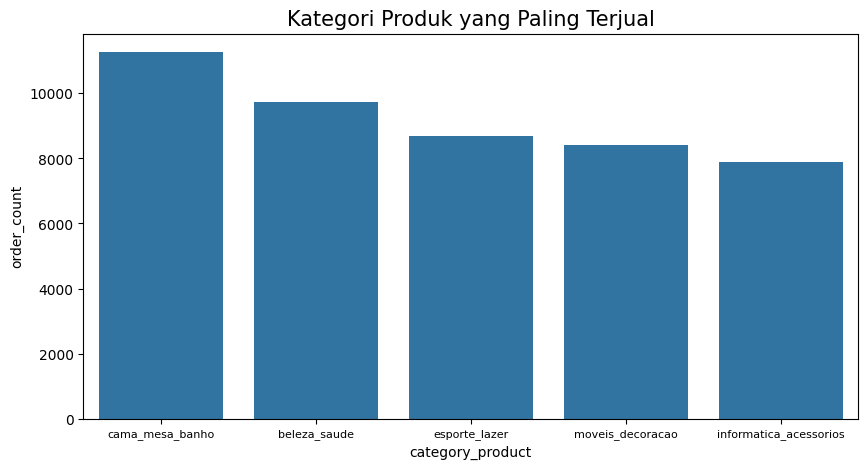

In [11]:
plt.figure(figsize=(10,5))
colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(
    y = "order_id",
    x = "product_category_name",
    data=review_product_df.head(5).sort_values(by="order_id",ascending=False)

)

plt.title("Kategori Produk yang Paling Terjual", loc="center",fontsize=15)
plt.ylabel("order_count")
plt.xlabel("category_product")
plt.tick_params(axis='x', labelsize = 8)
plt.show()


### Pertanyaan 2:

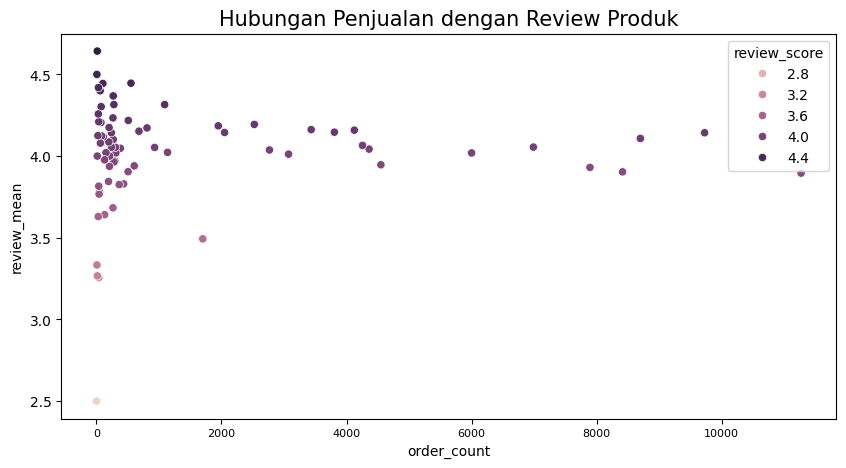

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x = "order_id",
    y= "review_score",
    data= review_product_df,
    hue="review_score",
)

plt.title("Hubungan Penjualan dengan Review Produk", loc="center",fontsize=15)
plt.ylabel("review_mean")
plt.xlabel("order_count")
plt.tick_params(axis='x', labelsize = 8)
plt.show()

**Insight:**
- Untuk mengetahui kategori produk yang terjual banyak menggunakan diagram batang atau `barplot()`, karena menampikan urutan jumlah yang terjual banyak
- Sedangkan untuk mengetahui hubungan antara penjualan dengan review menggunakan diagram pencar atau `scatterplot() `, karena mevisualisasi sebaran data

## Conclusion

- **Kesimpulan dari pertanyaan 1** adalah kategori produk yang terjual paling banyak adalah kategori `cama_mesa_banho` dengan total jumlah pemesanan 11.270
- **Kesimpulan dari pertanyaan 2** adalah hubungan antara penjualan dan review produk tidak memiliki hubungan yang kuat, jadi review bukan salah satu faktor penjualan suatu kategori produk